                                               Phase 4

                                        Unsupervised ML (Clustering)

 4.1  "Create 3 clusters as below.

    1. Sensitive Area's
    2. Moderate Area's
    3. Peaceful Area's"

4.2  Create DataFrame for each cluster that shows data according to the areas.

4.3  "Analyse your clusters and prepare a report that explains all your observations.

Example - 
    1. What is impacting more crimes in sensitive areas. 

      2. What needs to be done to reduce crime. 

      3. Most safe and unsafe districts.

       4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"


4.4   Capstone project overall story in your own words. Min 1000 words.

In [59]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#### IPC 2001-2012

In [2]:
ipcdf=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
ipcdf

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [3]:
ipcdf.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

#### DROPPING THE COLUMNS NOT USEFUL FOR CLUSTERING

In [39]:
ipcdf.rename(columns={'YEAR':'Year'},inplace=True)
ipcdf1=ipcdf[['STATE/UT', 'DISTRICT', 'Year', 'MURDER','RAPE','KIDNAPPING & ABDUCTION','DACOITY','ROBBERY', 'BURGLARY','RIOTS','COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT']]
ipcdf1

,STATE/UT,DISTRICT,Year,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,9,41,198,78,1,30,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,8,16,191,168,8,69,1543
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,4,14,237,156,9,38,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,1,4,98,164,2,23,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,4,25,437,70,3,41,1244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,0,0,0,0,0,0,2,0,0
8593,DELHI UT,WEST,2012,52,79,454,2,52,186,5,2,18,227
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,3,10,0,3,3
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,0,3,21,17,1,1,186


#### ST 2001-2012

In [5]:
stdf=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
stdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [6]:
stdf=stdf[stdf['DISTRICT']!='TOTAL']
stdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0


In [7]:
stdf['TOTAL ST CRIMES']=stdf.iloc[:,3:].sum(axis=1)
stdf

C:\Users\Admin\AppData\Local\Temp\ipykernel_18500\4000893170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stdf['TOTAL ST CRIMES']=stdf.iloc[:,3:].sum(axis=1)


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,TOTAL ST CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0,2
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0,0


In [8]:
stdf.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs',
       'TOTAL ST CRIMES'],
      dtype='object')

In [9]:
stdf1=stdf[['STATE/UT', 'DISTRICT', 'Year','TOTAL ST CRIMES']]
stdf1

,STATE/UT,DISTRICT,Year,TOTAL ST CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


#### WOMEN 2001-2012

In [10]:
womendf=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
womendf

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [11]:
womendf=womendf[womendf['DISTRICT']!='TOTAL']

In [12]:
womendf.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [13]:
womendf['TOTAL CRIMES AGAINST WOMEN']=womendf.iloc[:,3:].sum(axis=1)
womendf1=womendf[['STATE/UT', 'DISTRICT', 'Year','TOTAL CRIMES AGAINST WOMEN']]
womendf1

C:\Users\Admin\AppData\Local\Temp\ipykernel_18500\1789916196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womendf['TOTAL CRIMES AGAINST WOMEN']=womendf.iloc[:,3:].sum(axis=1)


,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


#### SC 2001-2012

In [14]:
scdf=pd.read_csv(r'C:\Users\Admin\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
scdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [15]:
scdf=scdf[scdf['DISTRICT']!='TOTAL']
scdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0


In [16]:
scdf['TOTAL CRIMES AGAINST SC']=scdf.iloc[:,3:].sum(axis=1)
scdf1=scdf[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]
scdf1

C:\Users\Admin\AppData\Local\Temp\ipykernel_18500\3253497434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scdf['TOTAL CRIMES AGAINST SC']=scdf.iloc[:,3:].sum(axis=1)


,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


#### CHILD 2001-2012

In [17]:
childdf=pd.read_csv(r'C:\Users\Admin\03_District_wise_crimes_committed_against_children_2001_2012.csv')
childdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [18]:
childdf=childdf[childdf['DISTRICT']!='TOTAL']
childdf

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,DELHI,STF,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9008,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7


In [19]:
childdf.rename(columns={'Total':'TOTAL CRIMES AGAINST CHILD'},inplace=True)
childdf1=childdf[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILD']]
childdf1

C:\Users\Admin\AppData\Local\Temp\ipykernel_18500\3899362482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf.rename(columns={'Total':'TOTAL CRIMES AGAINST CHILD'},inplace=True)


,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILD
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


## MERGING ALL  ABOVE DATAFRAMES

In [40]:
# Merge womendf1 and stdf1 on DISTRICT, STATE/UT, and Year
merged_df = pd.merge(womendf1, stdf1, on=['DISTRICT', 'STATE/UT', 'Year'], how='inner')

# Merge the above result with scdf1 on DISTRICT, STATE/UT, and Year
merged_df = pd.merge(merged_df, scdf1, on=['DISTRICT', 'STATE/UT', 'Year'], how='inner')

# Merge the above result with childdf1 on DISTRICT, STATE/UT, and Year
merged_df = pd.merge(merged_df, childdf1, on=['DISTRICT', 'STATE/UT', 'Year'], how='inner')

# Merge the above result with ipcdf1 on DISTRICT, STATE/UT, and Year
merged_df = pd.merge(merged_df, ipcdf1, on=['DISTRICT', 'STATE/UT', 'Year'], how='inner')


In [41]:
merged_df

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,454,18,55,0,101,50,46,9,41,198,78,1,30,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,356,14,127,66,151,23,53,8,16,191,168,8,69,1543
2,ANDHRA PRADESH,CHITTOOR,2001,456,2,114,0,101,27,59,4,14,237,156,9,38,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,278,4,100,0,80,20,25,1,4,98,164,2,23,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,475,14,89,0,82,23,49,4,25,437,70,3,41,1244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,6,0,0,7,3,5,2,1,3,24,6,0,10,15
8405,DAMAN & DIU,DIU,2012,2,0,0,1,0,0,1,0,0,2,3,0,1,2
8406,LAKSHADWEEP,LAKSHADWEEP,2012,2,0,0,0,0,0,0,0,0,3,10,0,3,3
8407,PUDUCHERRY,KARAIKAL,2012,11,0,1,7,5,6,2,0,3,21,17,1,1,186


In [42]:
#Grouping state and District columns
cluster=merged_df.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop('Year',axis=1)
cluster

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
0,A & N ISLANDS,A and N ISLANDS,54,1,0,10,15,3,12,5,9,90,17,1,11,99
1,A & N ISLANDS,ANDAMAN,458,33,0,206,118,92,73,4,63,708,115,9,80,910
2,A & N ISLANDS,CAR,2,0,0,2,2,0,1,1,0,0,0,0,0,4
3,A & N ISLANDS,NICOBAR,11,3,0,1,12,2,1,1,0,23,0,0,3,34
4,A & N ISLANDS,NORTH,9,0,0,7,5,4,0,0,1,6,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,3180,9,8,8,733,497,276,63,278,49,920,1,24,205
797,WEST BENGAL,SEALDAH G.R.P.,134,0,0,2,188,19,67,18,115,0,128,9,0,247
798,WEST BENGAL,SILIGURI G.R.P.,61,1,0,7,42,2,31,13,15,1,26,3,0,0
799,WEST BENGAL,SILIGURI_PC,552,8,0,44,32,21,123,3,29,3,9,0,3,812


# 4.1   "Create 3 clusters as below.
1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's"

In [43]:
cluster.isnull().sum()

STATE/UT                      0
DISTRICT                      0
TOTAL CRIMES AGAINST WOMEN    0
TOTAL ST CRIMES               0
TOTAL CRIMES AGAINST SC       0
TOTAL CRIMES AGAINST CHILD    0
MURDER                        0
RAPE                          0
KIDNAPPING & ABDUCTION        0
DACOITY                       0
ROBBERY                       0
BURGLARY                      0
RIOTS                         0
COUNTERFIETING                0
ARSON                         0
HURT/GREVIOUS HURT            0
dtype: int64

In [44]:
x=cluster.iloc[:,2:]

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [47]:
y_kmeans=kmeans.fit_predict(x)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 4.2 Create DataFrame for each cluster that shows data according to the areas.

## 1   PEACEFUL AREA

In [48]:
peaceful_area=cluster[y_kmeans==0]
peaceful_area

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
0,A & N ISLANDS,A and N ISLANDS,54,1,0,10,15,3,12,5,9,90,17,1,11,99
1,A & N ISLANDS,ANDAMAN,458,33,0,206,118,92,73,4,63,708,115,9,80,910
2,A & N ISLANDS,CAR,2,0,0,2,2,0,1,1,0,0,0,0,0,4
3,A & N ISLANDS,NICOBAR,11,3,0,1,12,2,1,1,0,23,0,0,3,34
4,A & N ISLANDS,NORTH,9,0,0,7,5,4,0,0,1,6,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,WEST BENGAL,PURAB MIDNAPUR,7020,6,34,89,707,555,1042,92,184,156,4082,18,68,113
796,WEST BENGAL,PURULIA,3180,9,8,8,733,497,276,63,278,49,920,1,24,205
797,WEST BENGAL,SEALDAH G.R.P.,134,0,0,2,188,19,67,18,115,0,128,9,0,247
798,WEST BENGAL,SILIGURI G.R.P.,61,1,0,7,42,2,31,13,15,1,26,3,0,0


## 2 MODERATE AREA

In [49]:
moderate_area=cluster[y_kmeans==1]
moderate_area

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
6,ANDHRA PRADESH,ADILABAD,8583,269,686,269,1186,672,754,72,237,2519,1016,33,395,16392
7,ANDHRA PRADESH,ANANTAPUR,5287,371,1569,402,1922,266,839,137,244,2536,1293,114,444,17682
10,ANDHRA PRADESH,CYBERABAD,15411,341,1657,296,1810,641,1398,141,765,11946,559,88,491,32697
11,ANDHRA PRADESH,EAST GODAVARI,9514,223,2042,213,1041,499,780,30,245,5069,768,225,479,31514
13,ANDHRA PRADESH,GUNTUR,12390,354,1831,709,1775,526,969,91,347,3509,1204,214,692,22209
15,ANDHRA PRADESH,HYDERABAD CITY,19685,76,1293,872,1455,712,1466,121,942,13435,2432,311,433,47343
16,ANDHRA PRADESH,KARIMNAGAR,16110,505,3331,2406,1674,853,1534,91,344,3258,2011,62,685,31334
17,ANDHRA PRADESH,KHAMMAM,10518,623,858,759,1337,721,919,63,195,2717,1667,69,439,18111
18,ANDHRA PRADESH,KRISHNA,10742,248,1973,879,842,528,650,22,126,2392,468,88,545,27498
19,ANDHRA PRADESH,KURNOOL,9850,288,3450,527,1529,419,785,101,215,2494,1340,114,380,19228


## 3 SENSITIVE AREA

In [50]:
sensitive_area=cluster[y_kmeans==2]
sensitive_area

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT
8,ANDHRA PRADESH,CHITTOOR,8004,14,1393,345,1270,368,907,96,207,2777,973,171,419,13543
9,ANDHRA PRADESH,CUDDAPAH,5002,128,1537,574,1196,298,653,39,106,1549,1326,48,337,14301
27,ANDHRA PRADESH,RANGA REDDY,3987,230,966,78,1091,338,450,66,213,3266,392,16,452,13892
29,ANDHRA PRADESH,SRIKAKULAM,4657,160,1200,146,405,274,217,24,66,1437,469,53,295,13049
31,ANDHRA PRADESH,VIJAYAWADA,5295,153,753,159,213,134,374,18,204,3101,62,57,119,9360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,UTTAR PRADESH,LUCKNOW,12679,22,2482,1251,1828,689,2914,186,1532,6663,2909,274,67,793
771,WEST BENGAL,24 PARGANAS NORTH,24376,21,22,1435,2329,1883,3311,248,739,387,5484,129,140,1879
772,WEST BENGAL,24 PARGANAS SOUTH,25115,0,7,238,2114,2221,2209,194,392,556,8893,41,129,1864
786,WEST BENGAL,JALPAIGURI,12073,6,6,364,1345,1777,1853,132,477,507,791,60,121,5558


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

# 4.3.3 Most safe and unsafe districts.

##### TOP 10 PEACEFUL AREAS TO LIVE

In [56]:
peaceful_area['Total crime']=peaceful_area.iloc[:,2:].sum(axis=1)
peaceful_area.sort_values(by='Total crime',ascending=True,inplace=True)
peaceful=peaceful_area.head(10).reset_index().drop(['index'],axis=1)
peaceful

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total crime
0,ASSAM,BIEO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HIMACHAL PRADESH,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,JAMMU & KASHMIR,RAILWAYS KATRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MANIPUR,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,JAMMU & KASHMIR,RAILWAYS JAMMU,1,0,0,0,0,0,0,0,0,0,0,0,1,0,6
5,JAMMU & KASHMIR,RAILWAYS KMR,2,0,0,0,0,0,0,0,0,1,0,0,0,0,9
6,TRIPURA,G.R.P.,1,0,0,0,0,0,0,0,0,1,0,0,0,1,9
7,JAMMU & KASHMIR,CRIME SRINAGAR,0,0,0,0,4,0,0,0,0,0,0,1,0,0,15
8,TRIPURA,GRP,0,0,0,0,2,0,0,0,0,0,1,0,0,3,18
9,JAMMU & KASHMIR,RAILWAYS KASHMIR,2,0,0,0,0,0,1,0,0,1,3,0,0,0,21


#### TOP 10 UNSAFE/SENSITIVE AREAS

In [57]:
sensitive_area['Total crime']=sensitive_area.iloc[:,2:].sum(axis=1)
sensitive_area.sort_values(by='Total crime',ascending=False,inplace=True)
sensitive=sensitive_area.head(10).reset_index().drop(['index'],axis=1)
sensitive

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total crime
0,MAHARASHTRA,PUNE COMMR.,6283,3,193,3391,1317,846,1087,309,3667,13165,6489,241,224,13740,152865
1,WEST BENGAL,24 PARGANAS SOUTH,25115,0,7,238,2114,2221,2209,194,392,556,8893,41,129,1864,131919
2,BIHAR,PATNA,5931,33,1503,893,4586,572,3502,951,4901,6855,5948,121,284,7533,130839
3,WEST BENGAL,24 PARGANAS NORTH,24376,21,22,1435,2329,1883,3311,248,739,387,5484,129,140,1879,127149
4,MADHYA PRADESH,GWALIOR,5760,595,2310,1582,1143,816,833,100,2055,11163,1771,25,250,12847,123750
5,MADHYA PRADESH,BHOPAL,7087,226,1565,1326,821,1272,610,48,1839,11236,1189,62,208,13023,121536
6,MAHARASHTRA,NAGPUR COMMR.,4876,23,164,1895,1175,566,646,198,2963,12414,2555,179,240,10923,116451
7,UTTAR PRADESH,LUCKNOW,12679,22,2482,1251,1828,689,2914,186,1532,6663,2909,274,67,793,102867
8,KERALA,KANNUR,5086,124,321,311,264,419,144,78,609,2687,9807,36,640,13662,102564
9,MAHARASHTRA,NANDED,5283,41,534,866,992,396,455,278,907,4347,3266,40,743,15343,100473


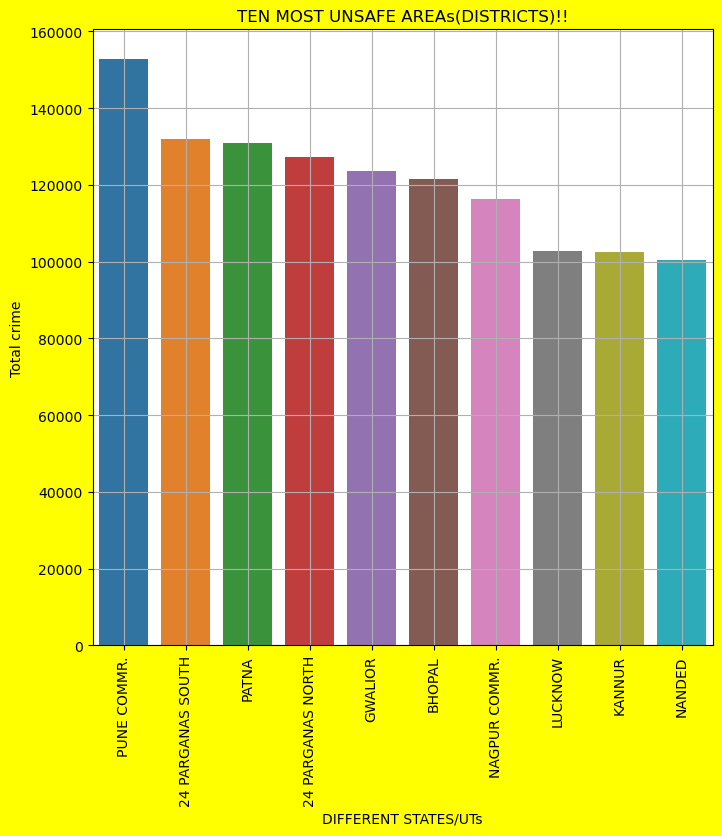

In [62]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['Total crime'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST UNSAFE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

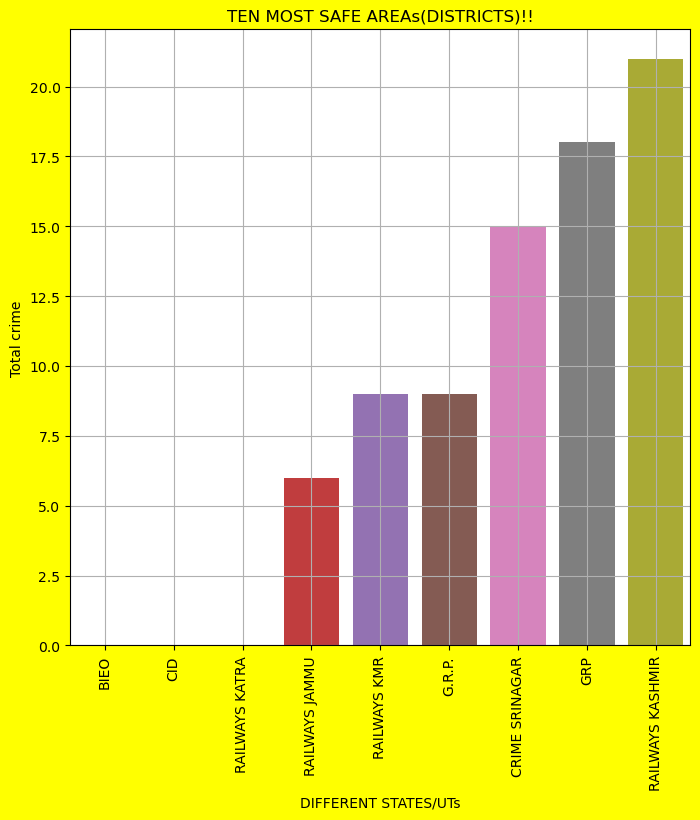

In [63]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=peaceful['DISTRICT'],y=peaceful['Total crime'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SAFE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

# 4.3.1  What is impacting more crimes in sensitive areas.

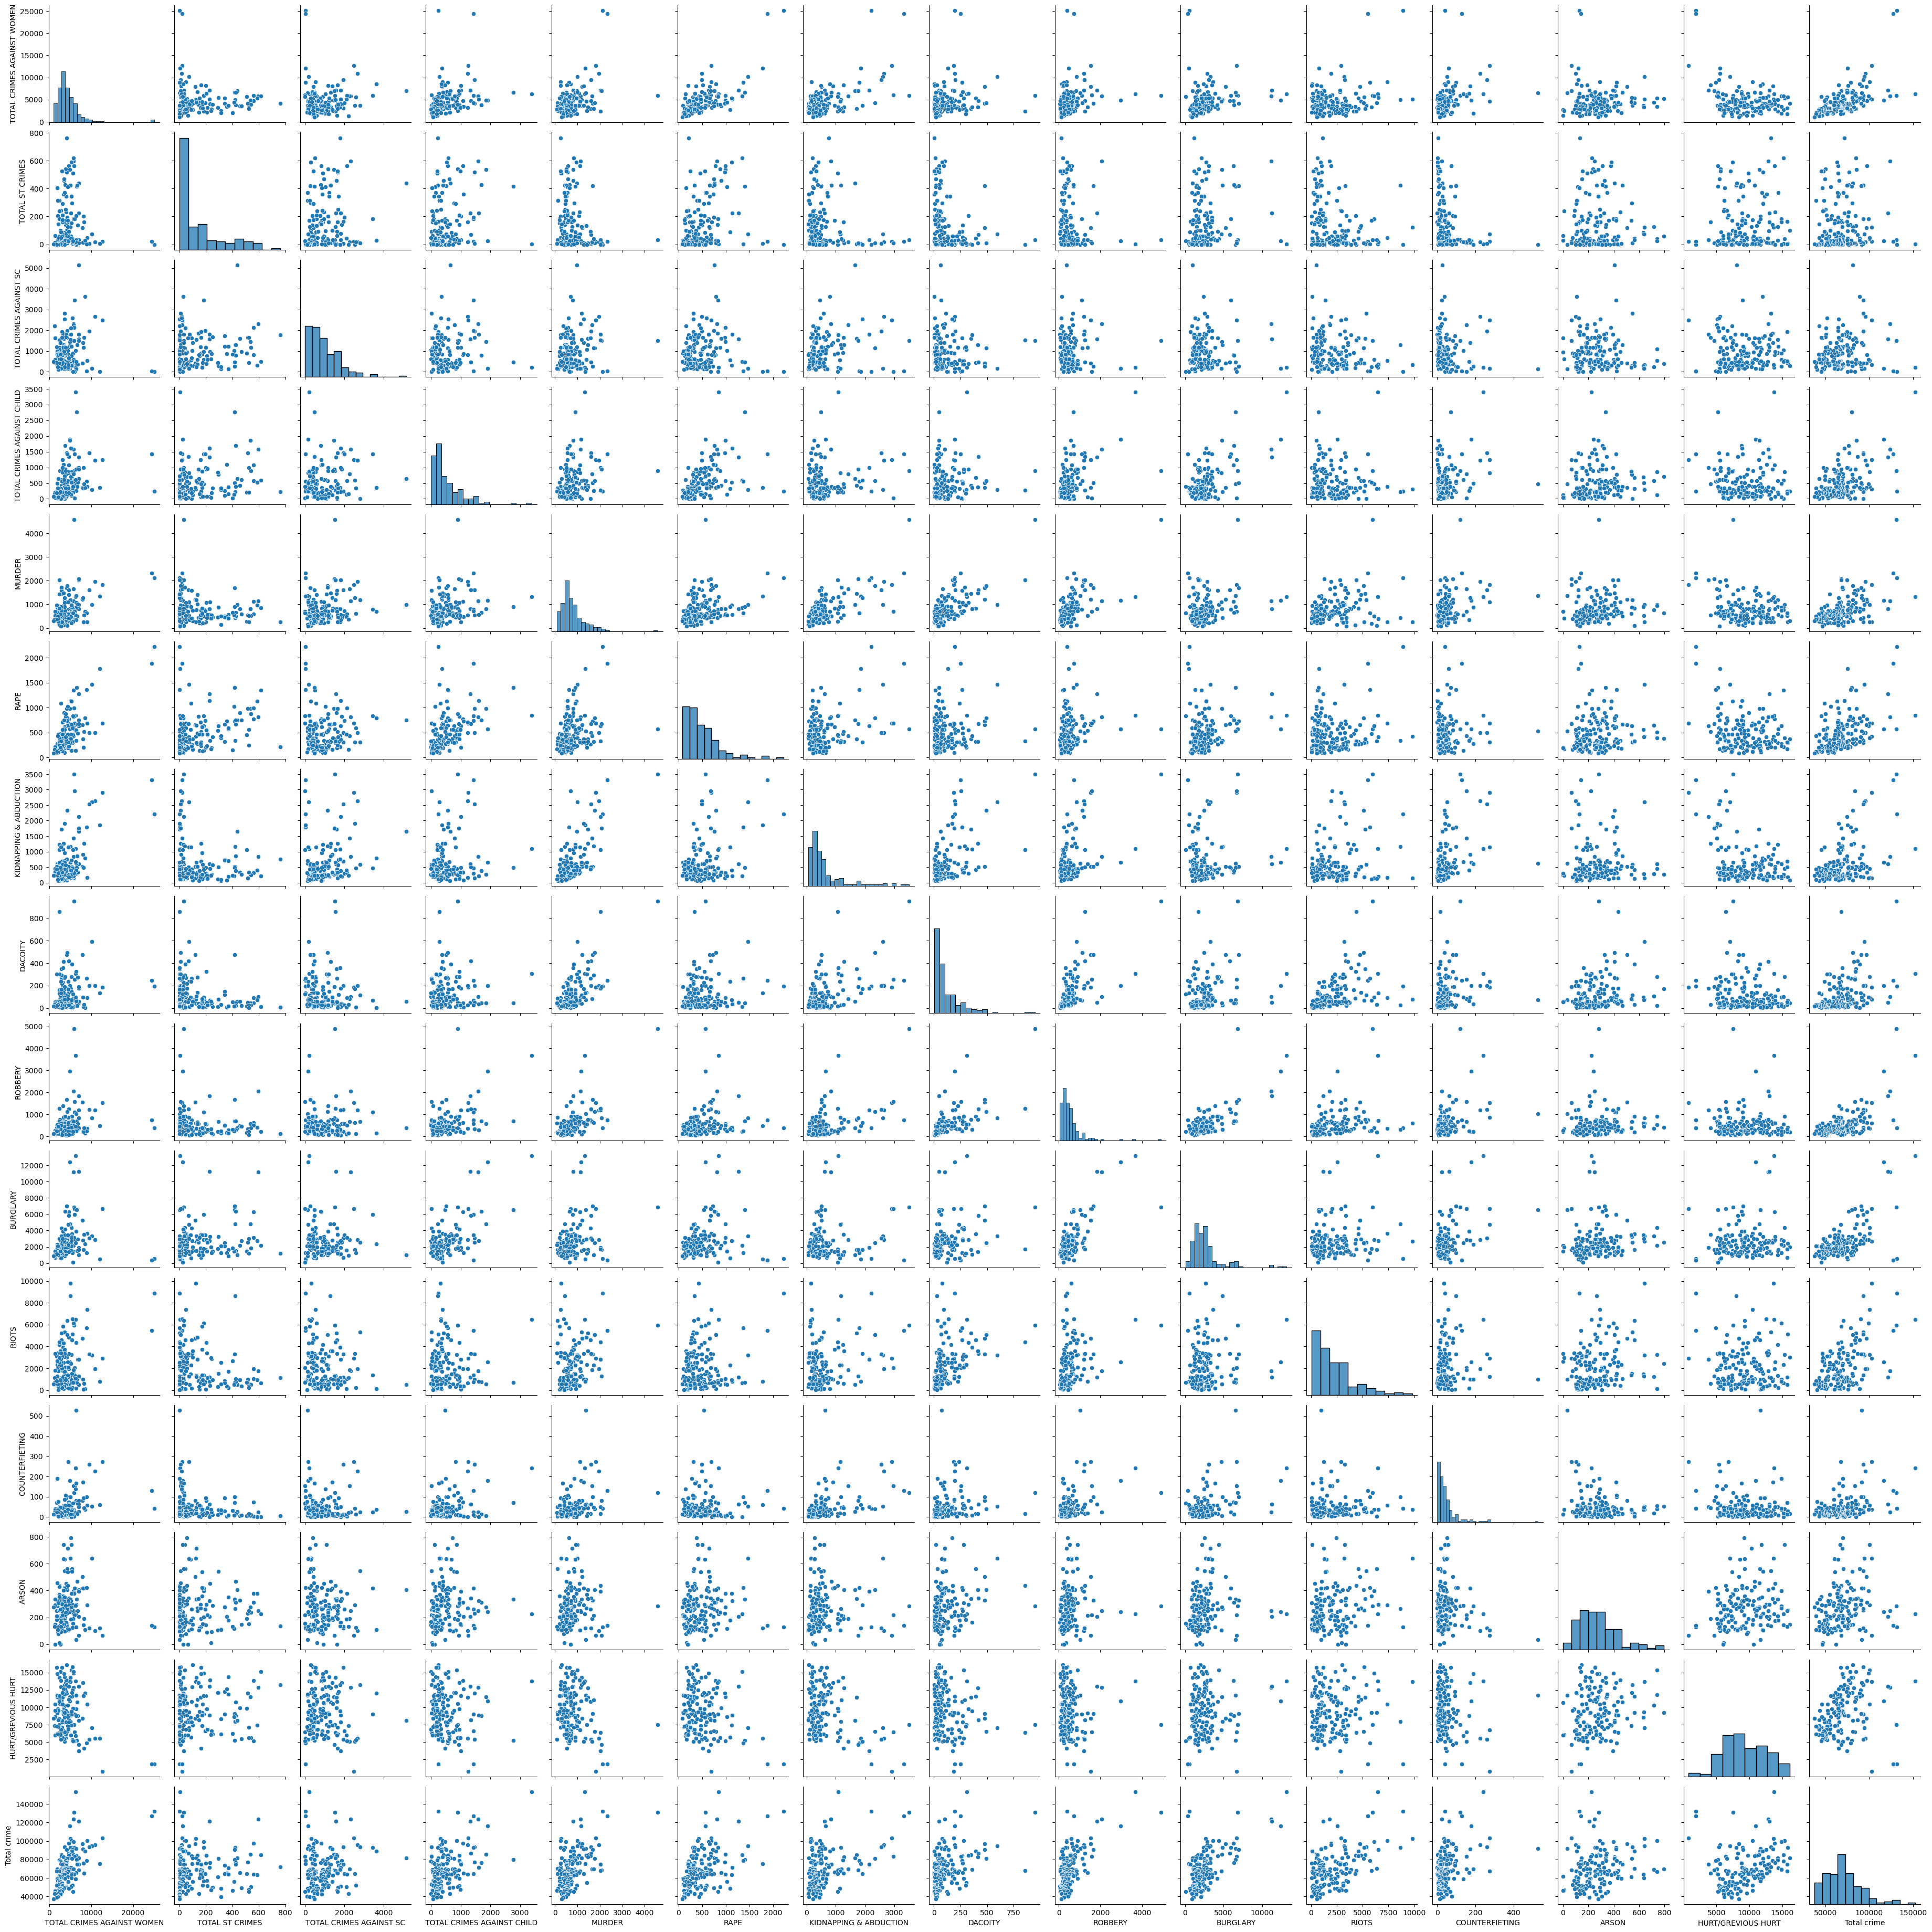

In [64]:
sns.pairplot(sensitive_area)

In [65]:
corr=sensitive_area.corr()
corr

,TOTAL CRIMES AGAINST WOMEN,TOTAL ST CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST CHILD,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,Total crime
TOTAL CRIMES AGAINST WOMEN,1.000000,-0.023281,0.042608,0.300521,0.415632,0.699765,0.596916,0.187088,0.198210,0.138275,0.287960,0.343966,-0.018447,-0.313068,0.616888
TOTAL ST CRIMES,-0.023281,1.000000,0.165007,0.210991,-0.187485,0.294978,-0.207523,-0.283401,-0.128622,0.113998,-0.262978,-0.256005,-0.035816,0.089398,0.011962
TOTAL CRIMES AGAINST SC,0.042608,0.165007,1.000000,0.084951,0.187060,0.006871,0.224611,-0.058882,0.038884,-0.011344,-0.178258,-0.074157,-0.097774,-0.042967,0.109709
TOTAL CRIMES AGAINST CHILD,0.300521,0.210991,0.084951,1.000000,0.285669,0.463705,0.170439,0.115875,0.495062,0.622884,0.003673,0.287492,0.063578,-0.089417,0.494080
MURDER,0.415632,-0.187485,0.187060,0.285669,1.000000,0.318959,0.704905,0.702374,0.661543,0.279281,0.292935,0.370843,0.080340,-0.213252,0.544691
RAPE,0.699765,0.294978,0.006871,0.463705,0.318959,1.000000,0.396625,0.151453,0.193381,0.212559,0.104495,0.054537,0.066045,-0.249220,0.482489
KIDNAPPING & ABDUCTION,0.596916,-0.207523,0.224611,0.170439,0.704905,0.396625,1.000000,0.517002,0.463752,0.111716,0.257134,0.427556,-0.039271,-0.389882,0.463750
DACOITY,0.187088,-0.283401,-0.058882,0.115875,0.702374,0.151453,0.517002,1.000000,0.637308,0.251952,0.446786,0.187377,0.236616,-0.167445,0.407028
ROBBERY,0.198210,-0.128622,0.038884,0.495062,0.661543,0.193381,0.463752,0.637308,1.000000,0.754638,0.308490,0.412290,0.083301,-0.045544,0.645227
BURGLARY,0.138275,0.113998,-0.011344,0.622884,0.279281,0.212559,0.111716,0.251952,0.754638,1.000000,0.134378,0.440322,0.092993,0.099988,0.627789


<Axes: >

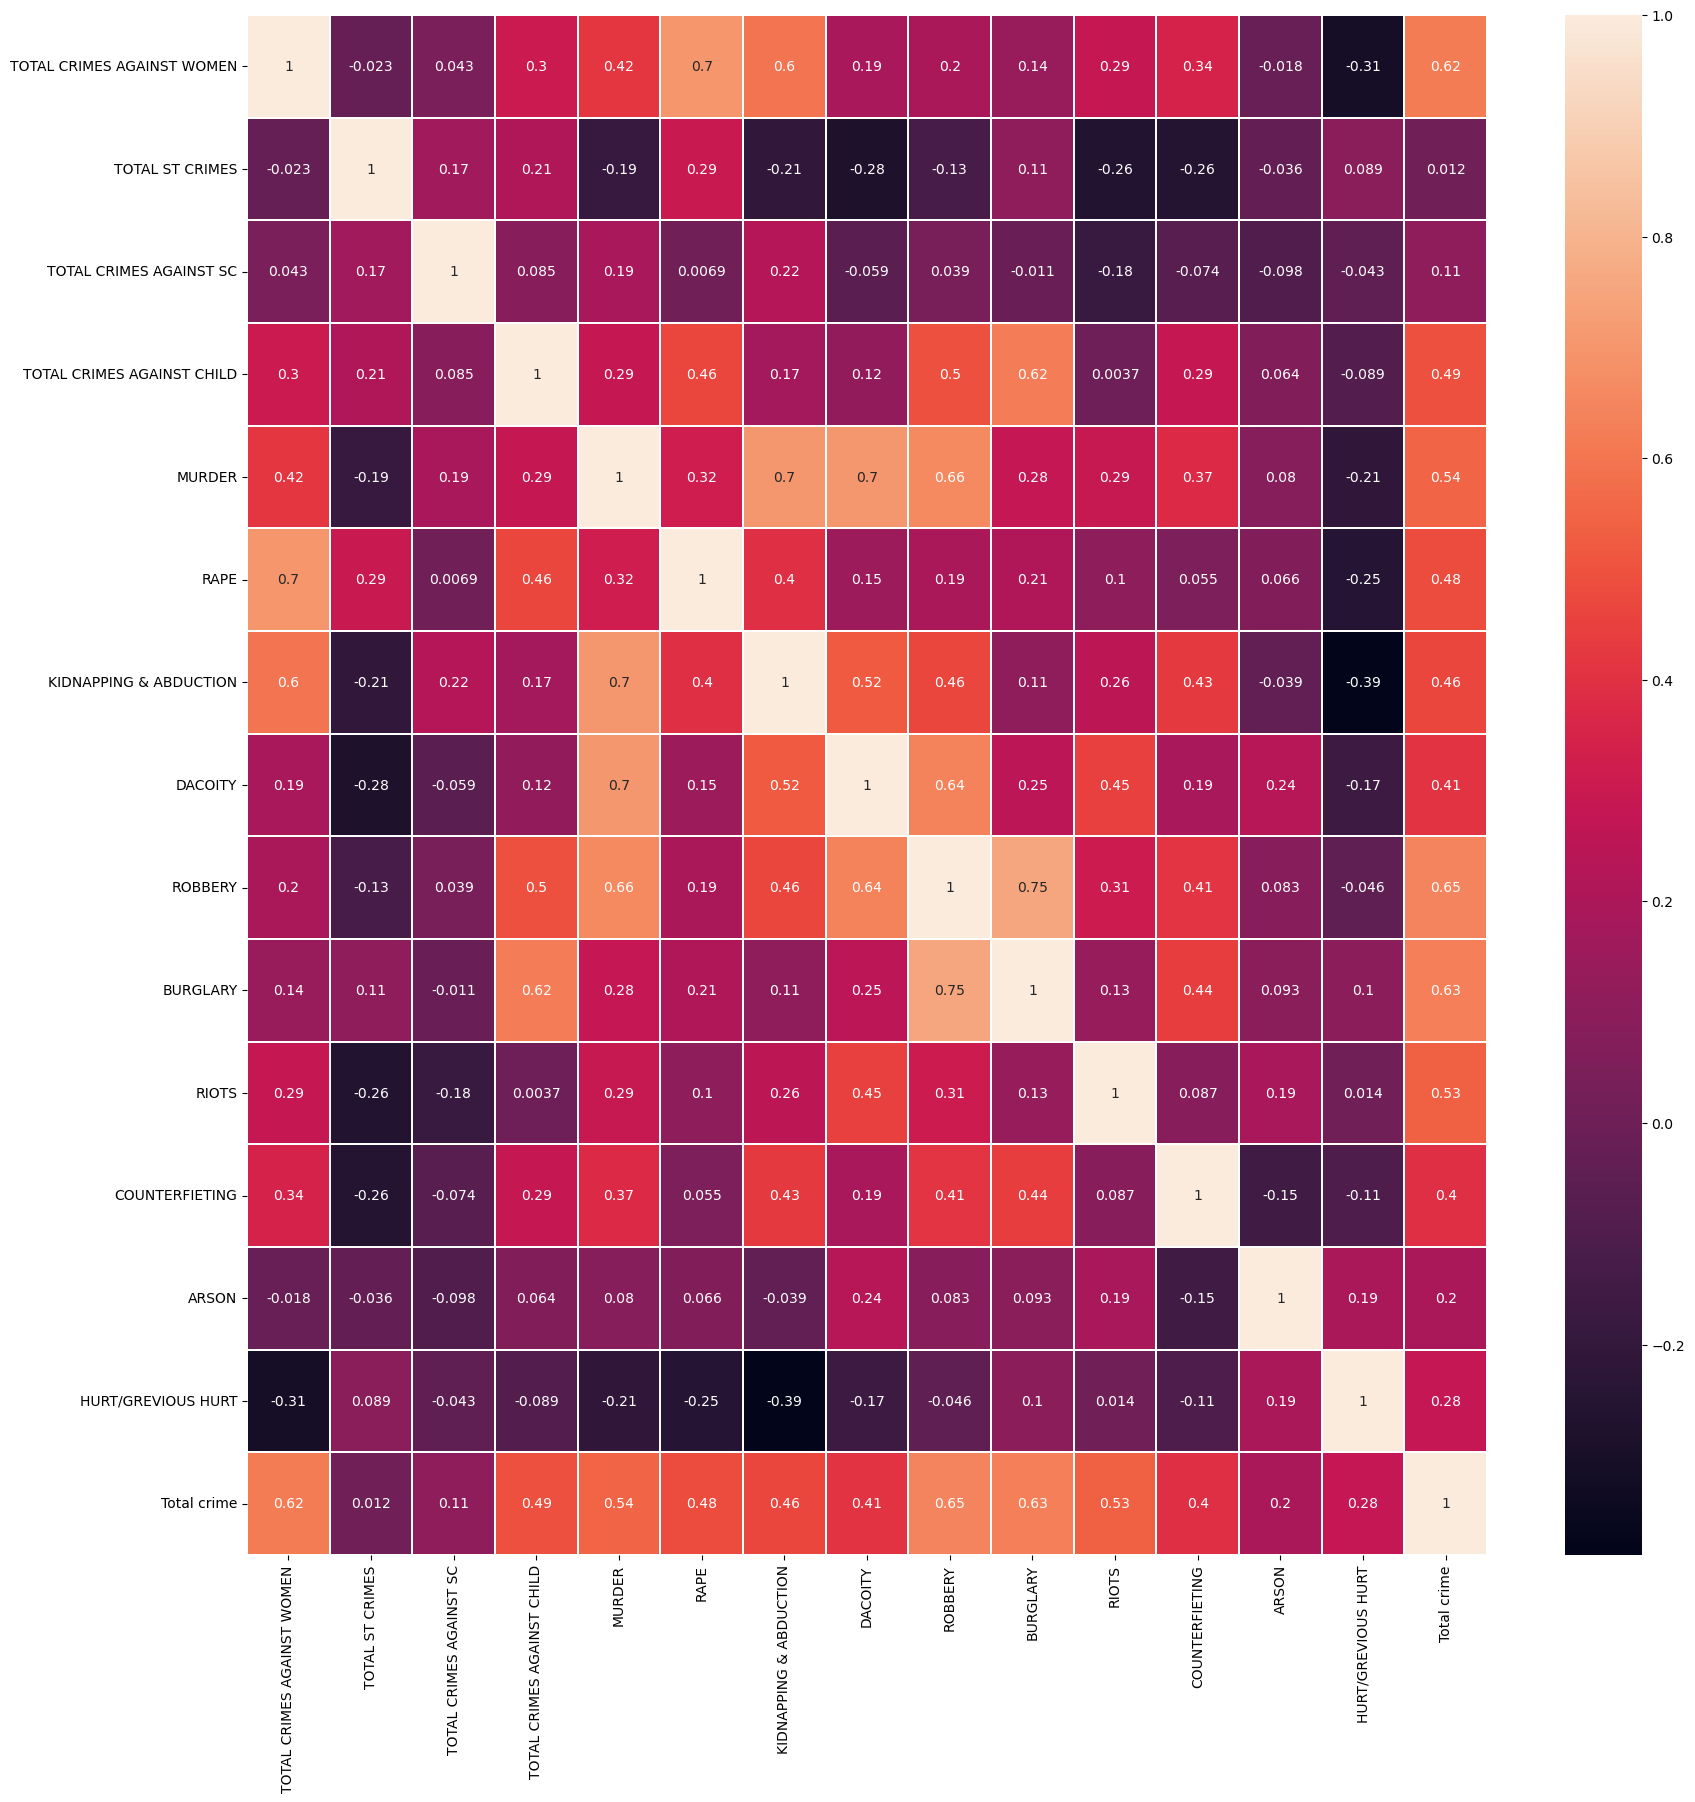

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths="0.1")

FROM ABOVE HEATMAP IS EVIDENT THAT CRIMES LIKE MURDER,ROBBERY,DACOITY,BURGLARY,KIDNAPPING ARE HIGLY CORELLATED TO TOTAL CRIME  
OTHER FEATURE CORRELATION CAN BE SEEN FROM HAETMAP


## 4.3.2 What needs to be done to reduce crime. 

Reducing crime in India necessitates a comprehensive and coordinated approach that addresses various
underlying factors contributing to criminal activities. Firstly, enhancing law enforcement capabilities 
through improved resources, training, and technology is crucial for preventing and combating crime effectively.
Community policing initiatives should be prioritized to build trust between law enforcement and local communities,
fostering collaboration in crime prevention efforts.   

Education and awareness campaigns play a pivotal role in promoting lawful behavior and highlighting the
consequences of criminal activities, particularly among at-risk populations. Additionally,
poverty alleviation measures such as employment generation programs and skill development initiatives are
essential for reducing socio-economic disparities, which often correlate with higher crime rates.    

Investing in social services like mental health support and substance abuse treatment is vital for addressing
the underlying issues driving criminal behavior and facilitating rehabilitation for offenders. 
Judicial reforms, including the reduction of case backlogs and ensuring swift trials, are imperative to improve access 
to justice and deterrence.    

Furthermore, community development projects aimed at improving infrastructure and access to basic amenities
contribute to creating safer and more cohesive communities. Targeted crime prevention programs focusing on
specific types of crime, such as cybercrime and crimes against women and children, should be implemented effectively.    

Public-private partnerships and collaboration with NGOs and community groups are essential for developing and 
implementing tailored crime prevention initiatives. Legislative reforms must be pursued to strengthen laws related
to crime prevention, victim protection, and law enforcement.    

Addressing corruption within law enforcement agencies and the judiciary is critical, as it undermines efforts to reduce crime.
Leveraging technology, such as surveillance systems and crime analytics, can enhance law enforcement effectiveness.
Promoting cultural and social norms of tolerance, respect, and non-violence is essential for fostering a safer and
more harmonious society.     

In conclusion, a concerted effort involving government agencies, civil society organizations, 
the private sector, and the community is necessary to implement these strategies effectively. 
Continuous evaluation and adaptation of these measures based on their effectiveness and evolving socio-economic dynamics 
are vital for sustained progress in reducing crime in India.   


# 4.4 Capstone project overall story in your own words. Min 1000 words.

Crime in India between 2001 and 2011 was influenced by various socio-economic factors,
including population growth, literacy rates, and regional disparities.
During this period, India experienced significant demographic changes, urbanization, and economic development,
all of which had implications for crime trends across different states and regions.     

Population Growth:
India's population witnessed steady growth during the 2001-2011 period, reaching over 1.2 billion by the end of 2011.
Rapid urbanization and migration from rural to urban areas led to the expansion of cities 
and increased population density in urban centers. 
This demographic shift had implications for crime patterns, as urban areas often experienced higher rates
of certain crimes compared to rural regions.    

Literacy Trends:
Literacy rates in India showed improvement over the decade, albeit with variations across states and regions. 
Efforts to promote education, especially among marginalized communities, contributed to higher literacy rates 
in many parts of the country. However, disparities in education access persisted, particularly in rural and remote areas,
impacting socio-economic development and potentially influencing crime rates.    


Now, let's explore crime trends across different states and categories:

Uttar Pradesh:
Uttar Pradesh, India's most populous state, witnessed various crime trends during the 2001-2011 period.
While the state grappled with high rates of violent crimes such as homicide and assault,
property crimes like theft and burglary were also prevalent, especially in urban areas like Lucknow and Kanpur. 
Despite efforts to improve literacy rates, Uttar Pradesh continued to face challenges in education access,
particularly in rural areas, which could influence crime rates.   

Maharashtra:
Maharashtra, home to Mumbai, India's financial capital, experienced diverse crime patterns during the decade.
While urban centers like Mumbai and Pune reported high rates of white-collar crime,
including fraud and corruption, rural areas faced challenges related to property crimes such as theft and robbery.
Despite relatively higher literacy rates in Maharashtra compared to national averages, 
disparities between urban and rural education persisted, potentially impacting crime dynamics.    

Bihar:
Bihar, a predominantly rural state with a large agrarian population, grappled with socio-economic challenges
during the period. High rates of violent crimes, including homicide and assault, were reported in some regions,
reflecting underlying tensions related to land disputes and caste-based conflicts.
Despite efforts to improve literacy rates, Bihar lagged behind national averages, particularly in rural areas,
which could exacerbate socio-economic inequalities and influence crime trends.      

Tamil Nadu:
Tamil Nadu, known for its industrial and technological advancements, experienced a mix of crime trends during the decade.
While urban centers like Chennai reported high rates of cybercrime and white-collar offenses, 
rural areas faced challenges related to property crimes and gender-based violence.
Efforts to improve literacy rates in Tamil Nadu resulted in significant progress,
with the state surpassing national averages, although disparities between urban and rural education persisted.  

Kerala:
Kerala, with its relatively high human development indicators, exhibited distinct crime patterns
compared to other states. While violent crimes were relatively low, property crimes like theft
and burglary posed challenges, especially in urban areas. Kerala's focus on education and social 
welfare programs contributed to high literacy rates, surpassing national averages and narrowing urban-rural 
disparities, which could have implications for crime prevention and socio-economic development.   


In summary, crime trends in India between 2001 and 2011 were influenced by population dynamics, literacy rates, 
and regional disparities. While efforts were made to address socio-economic challenges and improve education access,
persistent inequalities and urban-rural divides continued to shape crime patterns across different states and regions. 
Moving forward, comprehensive strategies encompassing crime prevention, education reform, and socio-economic development 
are essential to address root causes and promote safer communities nationwide.     